In [1]:
from RAG import RAG
import numpy as np
import matplotlib.pyplot as plt

(256, 256)


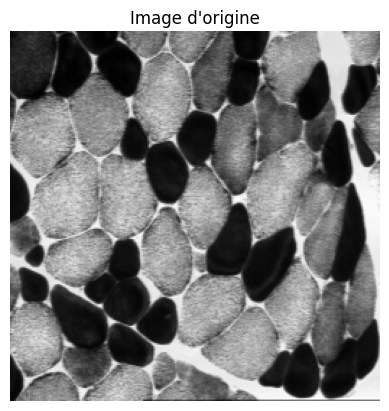

In [3]:
img = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 127, 127, 127, 0, 0],
    [0, 0, 127, 127, 127, 255, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
    ], dtype=int)

img = plt.imread("img/musc.bmp")
print(img.shape)
plt.title("Image d'origine")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

# Partie I : Division

In [ ]:
# Division
graphe = RAG(img)
#graphe.split()
graphe.quad_tree(thresh=50)


# Affichage de l'arbre
graphe.print_quad_tree()
print("Le nombre de noeuds dans l'arbre :")
print(graphe.get_tree_size())
"""
# Dessin du graphe
graphe.plot_graph()

# La représentation du graphe sous forme de dictionnaire d'adjacence
# Utile pour la 2eme partie (fusion)
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    print(f"{vertex:3} : {adj_dict[vertex]}")"""

L'arbre de la division de l'image :
                                 ┌─ 341
                         ┌─  85 ─┼─ 342
                         │       ├─ 343
                         │       └─ 344
                         │       ┌─ 345
                         │       │        ┌─ 1341
                         │       │        │        ┌─  4637
                         │       │        │        ├─  4638
                         │       │        ├─ 1342 ─┼─  4639
                         │       ├─ 346  ─┤        │         ┌─ 12161
                         ├─  86 ─┤        │        └─  4640 ─┼─ 12162
                         │       │        │                  ├─ 12163
                         │       │        │                  └─ 12164
                         │       │        ├─ 1343
                         │       │        └─ 1344
                         │       ├─ 347
                  ┌─ 21 ─┤       └─ 348
                  │      ├─  87
                  │      │       ┌─ 349
  

'\n# Dessin du graphe\ngraphe.plot_graph()\n\n# La représentation du graphe sous forme de dictionnaire d\'adjacence\n# Utile pour la 2eme partie (fusion)\nprint("Le dictionnaire d\'adjacence du RAG :")\nadj_dict = graphe.get_adj_dict()\nfor vertex in adj_dict:\n    print(f"{vertex:3} : {adj_dict[vertex]}")'

In [ ]:
graphe.build_RAG()

# Partie II : Fusion

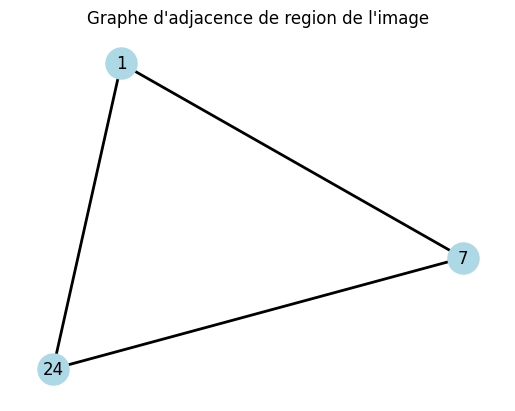

Le dictionnaire d'adjacence du RAG :
  1 : [7, 24]
  7 : [1, 24]
 24 : [1, 7]


In [ ]:
# Fusion
graphe.merge()
graphe.plot_graph()
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    print(f"{vertex:3} : {adj_dict[vertex]}")

# Partie III : Segmentation de l'image

 1 -> [1, 9, 5, 17, 6, 11, 8, 12, 14, 15, 16]
 7 -> [7, 22, 21, 18, 23, 20, 19]
24 -> [24]


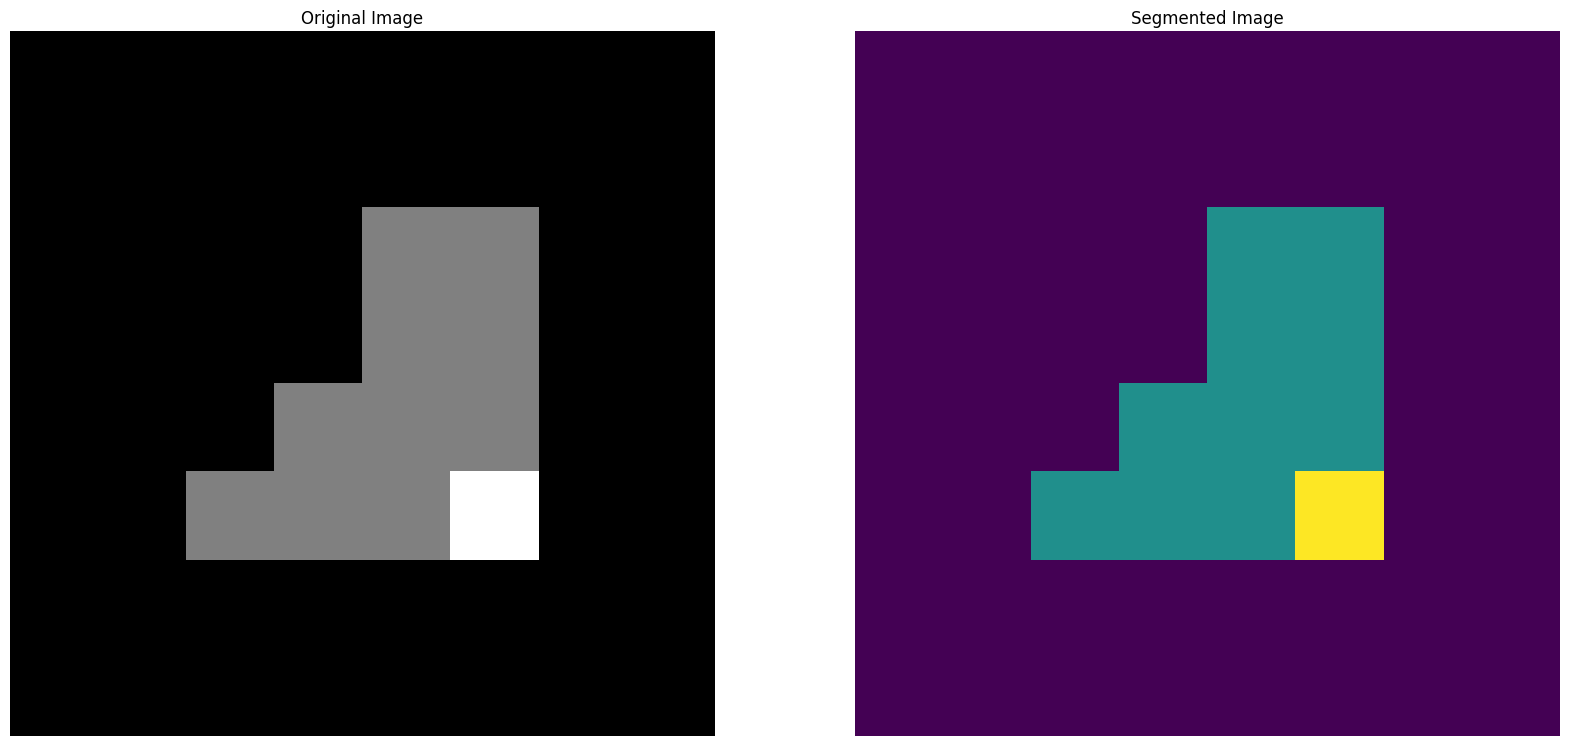

In [ ]:
# L'arbre contient la trace de notre travail
# elle fera le travail d'index danse
for node in graphe.get_adj_dict():
    print(f"{node:2} -> {graphe.get_segment_components(node)}")  

r, c = graphe.img_.shape
steps = []

for i in range(graphe.profondeur_global()):
    steps.append((r/2**(i+1), c/2**(i+1)))

def build_offset_mat(step_x, step_y):
    return np.vstack([step_x*np.array([0, 0, 1, 1]), step_y*np.array([0, 1, 0, 1])]).T.astype(int)

def child_rank(node):
    return node.parent.children.index(node)

def unhash(i):
    if i == 0:
        return 0, img.shape[0], 0, img.shape[1]
    node = graphe.get_node(graphe.quad_tree_, str(i))
    ancestors = graphe.parent_at_level(node)[1]
    pos = np.array([0, 0], dtype=int)
    for i in range(len(ancestors)):
        node = graphe.get_node(graphe.quad_tree_, str(ancestors[i]))
        offset = build_offset_mat(*steps[i])
        pos = pos + offset[child_rank(node)]

    dI = build_offset_mat(*steps[len(ancestors)-1])[3]
    return pos[0], pos[0]+dI[0], pos[1], pos[1]+dI[1]

img_ = np.zeros(shape=img.shape)
cpt = 1
for i in graphe.adj_dict_:
    for node in graphe.get_segment_components(i):
        x_i, x_f, y_i, y_f = unhash(node)
        img_[x_i:x_f, y_i:y_f] = cpt
    cpt += 1

plt.figure(figsize=(20, 40))
plt.subplot(121), plt.title("Original Image"), plt.axis('off')
plt.imshow(img_, cmap='gray')
plt.subplot(122), plt.title("Segmented Image"), plt.axis('off')
plt.imshow(img)
plt.show()